In [42]:
# SUMMARY:
# Analyze credit card data from N = 400 training observations.Fit a model that can predict 
# credit balance based on 9 features describing an individual. Features include an individual’s 
# income, credit limit, credit rating, number of credit cards, age, education level, gender, 
# student status, and marriage status. 
# DELIVERABLE 1:
# A penalized (regularized) least squares fit of a linear model using ridge regression, with
#     the model parameters obtained by batch gradient descent. 
# DELIVERABLE 2:
# Find best tuning parameter (λ) using five-fold cross validation, CV (5).
# DELIVERABLE 3:
# Indicate the value of λ that generated the smallest CV (5) error.
# DELIVERABLE 4:
# Given the optimal λ, retrain the model on the entire dataset of N = 400
#     observations and provide the estimates of the p = 9 best-fit model parameters.

In [43]:
import numpy as np
import pandas as pd
import random
random.seed(10)
import matplotlib.pyplot as plt
import os  # operating package to build directory



# setup for multiple outputs from single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# silence warnings
import warnings
warnings.filterwarnings("ignore")

In [44]:
# Read csv file into dataframe
# setting working directory
directory = "/media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida Atlantic University/MSAI/CAP 5625 - AI Comp Foundations/ASSIGN_1/"
os.chdir(directory)
# import data file
credit_df = pd.read_csv('Credit_N400_p9_numeric.csv')
# verify transfer of csv file contents into dataframe
print("ORIGINAL CSV DATA:\n")
print(credit_df.head(5))
print(credit_df.tail(5))
# find dimensions of dataframe
(m,n) = np.shape(credit_df)
print(m,n)

ORIGINAL CSV DATA:

    Income  Limit  Rating  Cards  Age  Education  Gender  Student  Married  \
0   14.891   3606     283      2   34         11       1        0        1   
1  106.025   6645     483      3   82         15       0        1        1   
2  104.593   7075     514      4   71         11       1        0        0   
3  148.924   9504     681      3   36         11       0        0        0   
4   55.882   4897     357      2   68         16       1        0        1   

   Balance  
0      333  
1      903  
2      580  
3      964  
4      331  
     Income  Limit  Rating  Cards  Age  Education  Gender  Student  Married  \
395  12.096   4100     307      3   32         13       1        0        1   
396  13.364   3838     296      5   65         17       1        0        0   
397  57.872   4171     321      5   67         12       0        0        1   
398  37.728   2525     192      1   44         13       1        0        1   
399  18.701   5524     415      5   64

In [45]:
# identify contents of character categorical variables to be replaced with numerical categorical variables
print ("Gender categories:", credit_df['Gender'].unique())
print ("Student categories:", credit_df['Student'].unique())
print ("Married categories:", credit_df['Married'].unique())

# replace 'Gender' string variables with numeric variables
# 'Male' => 1, 'Female' => 0 
for i in range(0,len(credit_df)):
    if   (credit_df.loc[i, 'Gender'] == 'Male'):
        credit_df.loc[i, 'Gender'] = 1
    elif (credit_df.loc[i, 'Gender'] == 'Female'):
        credit_df.loc[i, 'Gender'] = 0
        
# replace 'Student' string variables with numeric variables
# 'Yes' => 1, 'No' => 0 
for i in range(0,len(credit_df)):
    if   (credit_df.loc[i, 'Student'] == 'Yes'):
        credit_df.loc[i, 'Student'] = 1
    elif (credit_df.loc[i, 'Student'] == 'No'):
        credit_df.loc[i, 'Student'] = 0
        
# replace 'Married' string variables with numeric variables
# 'Yes' => 1, 'No' => 0 
for i in range(0,len(credit_df)):
    if   (credit_df.loc[i, 'Married'] == 'Yes'):
        credit_df.loc[i, 'Married'] = 1
    elif (credit_df.loc[i, 'Married'] == 'No'):
        credit_df.loc[i, 'Married'] = 0

Gender categories: [1 0]
Student categories: [0 1]
Married categories: [1 0]


In [46]:
# show new numeric dataframe
print("NUMERIC CSV DATA:\n")
print(credit_df.head(5))
print(credit_df.tail(5))
# find dimensions of dataframe
(m,n) = np.shape(credit_df)
print(m,n)

NUMERIC CSV DATA:

    Income  Limit  Rating  Cards  Age  Education  Gender  Student  Married  \
0   14.891   3606     283      2   34         11       1        0        1   
1  106.025   6645     483      3   82         15       0        1        1   
2  104.593   7075     514      4   71         11       1        0        0   
3  148.924   9504     681      3   36         11       0        0        0   
4   55.882   4897     357      2   68         16       1        0        1   

   Balance  
0      333  
1      903  
2      580  
3      964  
4      331  
     Income  Limit  Rating  Cards  Age  Education  Gender  Student  Married  \
395  12.096   4100     307      3   32         13       1        0        1   
396  13.364   3838     296      5   65         17       1        0        0   
397  57.872   4171     321      5   67         12       0        0        1   
398  37.728   2525     192      1   44         13       1        0        1   
399  18.701   5524     415      5   64 

In [47]:
# create empty data frame to hold centered and normalized data
norm_credit_df = pd.DataFrame(columns=[])
# create function to center and normalize predictor matrix variables
def function_center_norm (array):
  normed_array = ( array - np.mean(array) )/ np.std (array)
  return normed_array
# center and normalize data then add to data frame with column name
for x in range(n-1):
    array_pre_norm = np.array( credit_df.iloc[:,x] )
    array_post_norm = function_center_norm (array_pre_norm)
    if x==0:
        norm_credit_df['Income'] = array_post_norm.tolist()
    elif x==1:
        norm_credit_df['Limit'] = array_post_norm.tolist()
    elif x==2:
        norm_credit_df['Rating'] = array_post_norm.tolist()
    elif x==3:
        norm_credit_df['Cards'] = array_post_norm.tolist()
    elif x==4:
        norm_credit_df['Age'] = array_post_norm.tolist()
    elif x==5:
        norm_credit_df['Education'] = array_post_norm.tolist()
    elif x==6:
        norm_credit_df['Gender'] = array_post_norm.tolist()
    elif x==7:
        norm_credit_df['Student'] = array_post_norm.tolist()
    elif x==8:
        norm_credit_df['Married'] = array_post_norm.tolist()
# isolate centered, normalized feature matrix X from dataframe
feature_matrix_X = norm_credit_df.to_numpy()

In [48]:
# create function to center response vector
def function_center (array):
    centered_array = ( array - np.mean(array) )
    return centered_array
# center response vector and add to centered and normalized dataframe
array_pre_center = np.array( credit_df.iloc[:,n-1] )
array_post_center = function_center (array_pre_center)
norm_credit_df['Balance'] = array_post_center.tolist()
# isolate centered response vector Y from dataframe
response_vector_Y = norm_credit_df['Balance'].to_numpy()
# verify new dataframe with centered and normalized data
# verify transfer of csv file contents into dataframe
print("\nCENTERED/NORMALIZED FEATURE MATRIX & CENTERED RESPONSE VECTOR:\n")
print(norm_credit_df.head(5))
print(norm_credit_df.tail(5))


CENTERED/NORMALIZED FEATURE MATRIX & CENTERED RESPONSE VECTOR:

     Income     Limit    Rating     Cards       Age  Education    Gender  \
0 -0.861583 -0.489999 -0.465539 -0.699130 -1.257674  -0.784930  1.035635   
1  1.727437  0.828261  0.828703  0.031032  1.528451   0.496588 -0.965592   
2  1.686756  1.014787  1.029311  0.761194  0.889964  -0.784930  1.035635   
3  2.946152  2.068440  2.110003  0.031032 -1.141586  -0.784930 -0.965592   
4  0.302928  0.070012  0.013331 -0.699130  0.715831   0.816968  1.035635   

    Student   Married  Balance  
0 -0.333333  0.795395 -187.015  
1  3.000000  0.795395  382.985  
2 -0.333333 -1.257237   59.985  
3 -0.333333 -1.257237  443.985  
4 -0.333333  0.795395 -189.015  
       Income     Limit    Rating     Cards       Age  Education    Gender  \
395 -0.940986 -0.275711 -0.310230  0.031032 -1.373763  -0.144171  1.035635   
396 -0.904963 -0.389362 -0.381413  1.491355  0.541698   1.137347  1.035635   
397  0.359462 -0.244913 -0.219633  1.491355  0

In [49]:
#######################  DELIVERABLE 1 ##########################################################
# A penalized (regularized) least squares fit of a linear model using ridge regression, with
#     the model parameters obtained by batch gradient descent. 

# CONCEPT: Ridge Regression is Ordinary Least Squares modified to also minimize 
#          the squared absolute sum of the coefficients

# perform a penalized (regularized) least squares fit of a linear model using ridge regression, with
# the model parameters obtained by batch gradient descent.
# define alpha (α) and lambda (λ)
# define alpha and lambda
alpha = pow (10, -5)
print("\nALPHA:", alpha)
lamb_da = pow (10, 4)
print("LAMBDA:", lamb_da)

# create betas array (β) 
betas = []
# fill betas array with random numbers
for i in range(9):
    betas.append( random.randrange(-10, 10, 1)/10 + 0.001 )
# check contents of betas array
print("\nINITIAL BETAS VECTOR:\n")
print( betas)

print("\nCONVERGENCE OF BETAS VECTOR:\n")
# converge betas vector over 100,000 rounds using 
# formula β := β − 2α[λβ − trans(X)* (y − Xβ)]
# and print updated betas vector every 20,000 rounds

for i in range (pow (10, 5)):
  A = np.matmul ( feature_matrix_X.transpose(), ( np.array(response_vector_Y) - np.matmul(np.array(feature_matrix_X), np.array(betas)) ) )
  betas = np.array(betas) - 2*alpha* ( lamb_da*np.array(betas) - np.array(A) )
  if i%20000==0:
    print (betas)
     
print("\nFINAL CONVERGED BETAS VECTOR:\n")
print (betas)


ALPHA: 1e-05
LAMBDA: 10000

INITIAL BETAS VECTOR:

[0.801, -0.899, 0.301, 0.501, 0.801, -0.999, -0.399, 0.401, 0.501]

CONVERGENCE OF BETAS VECTOR:

[ 2.33996816  2.44492408  3.41170755  0.71396096  0.64071969 -0.82097092
 -0.3948054   1.26992621  0.3769633 ]
[ 7.30675542 14.44169723 14.4740176   1.50156964 -0.12798262 -0.11412644
 -0.36379165  4.57395306 -0.13420054]
[ 7.30675542 14.44169723 14.4740176   1.50156964 -0.12798262 -0.11412644
 -0.36379165  4.57395306 -0.13420054]
[ 7.30675542 14.44169723 14.4740176   1.50156964 -0.12798262 -0.11412644
 -0.36379165  4.57395306 -0.13420054]
[ 7.30675542 14.44169723 14.4740176   1.50156964 -0.12798262 -0.11412644
 -0.36379165  4.57395306 -0.13420054]

FINAL CONVERGED BETAS VECTOR:

[ 7.30675542 14.44169723 14.4740176   1.50156964 -0.12798262 -0.11412644
 -0.36379165  4.57395306 -0.13420054]


In [50]:
# print Deliverable dataframe
print("\nDELIVERABLE # 1:\n")

# create function to find betas vectors for range of lambda values
n = 0
def function_betas_from_lambdas ( alpha, betas, the_lambdas, feature_matrix_X, response_vector_Y ):
  # define an array to hold all grouped betas vectors
  betas_group = []  
  for n in range(len(the_lambdas)):
    lamb_da = the_lambdas[n]
    for i in range (pow (10, 5)):
      A = np.matmul ( feature_matrix_X.transpose(), ( np.array(response_vector_Y) 
                                                     - np.matmul(np.array(feature_matrix_X), np.array(betas)) ) )
      betas = np.array(betas) - 2*alpha* ( lamb_da*np.array(betas) - np.array(A) )
    betas_group = np.concatenate((betas_group, betas), axis=0)
  betas_group = np.reshape(betas_group, (7, 9))
  return betas_group

# define range of lambdas to test for generation of bates vector
the_lambdas = [0.01, 0.1, 1, 10, 100, 1000, 10000 ]
# call function to find betas vectors for range of lambda values
raw_betas_array = function_betas_from_lambdas ( alpha, betas, the_lambdas, feature_matrix_X, response_vector_Y)

# convert array to dataframe
lambda_plot_df = pd.DataFrame(raw_betas_array)
# define dataframe axis labels
index=['0.01', '0.1', '1', '10', '100', '1000', '10000']
columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
# add dataframe column labels
lambda_plot_df.columns = columns
# add lambdas column to dataframe
lambda_plot_df.insert(0, "Lambdas", index, True)
# print final dataframe
print(lambda_plot_df)


DELIVERABLE # 1:

  Lambdas      Income       Limit      Rating      Cards        Age  \
0    0.01 -274.653494  419.602125  195.891110  23.446334 -10.965025   
1     0.1 -274.308114  428.960380  186.174099  23.870508 -10.977790   
2       1 -271.228044  370.933188  241.193005  21.552987 -11.269198   
3      10 -242.108334  302.250287  280.525289  20.274797 -13.321292   
4     100  -94.639427  211.365448  209.546148  22.364962 -19.175688   
5    1000   22.933101   84.077705   84.217036  10.265650  -5.693172   
6   10000    7.306755   14.441697   14.474018   1.501570  -0.127983   

   Education    Gender     Student   Married  
0  -3.347070  5.200975  127.783302 -3.595376  
1  -3.392064  5.190094  127.802706 -3.534276  
2  -3.052598  5.093992  127.086744 -3.965836  
3  -2.361228  4.185772  123.168277 -4.711108  
4  -0.461881 -0.219414   97.667029 -5.732029  
5  -0.099719 -1.993300   34.002375 -1.959075  
6  -0.114126 -0.363792    4.573953 -0.134201  


<AxesSubplot: xlabel='Lambdas'>

Text(0.5, 0, 'Lambdas')

Text(0, 0.5, 'Standardized Coefficients')

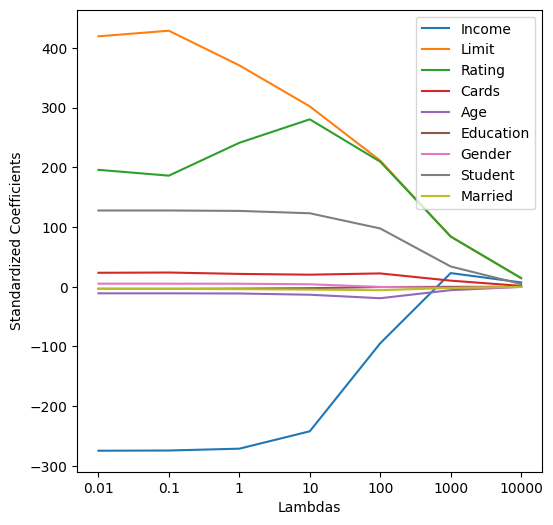

In [51]:
# plot dataframe columns as lines
lambda_plot_df.plot(x="Lambdas",  y=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married'],
        kind="line", figsize=(6, 6))
 
# display plot
plt.xlabel("Lambdas")
plt.ylabel("Standardized Coefficients")
plt.show()

In [52]:
#######################  DELIVERABLE 2 ##########################################################
# Find best tuning parameter (λ) using five-fold cross validation, CV (5).

# function to find betas then MSE  for each pairing of training set - validation set 
def function_betas_then_mse(alpha, lamb_da, training_set, validation_set):
  betas = []
  for i in range(9):	
    betas.append( random.randrange(-10, 10, 1)/10 + 0.001 )
   # β := β − 2α[λβ − trans(X)* (y − Xβ)]
  for i in range (pow (10, 5)):
    A = np.matmul ( training_set[:,0:9].transpose(), ( np.array(training_set[:,9]) - np.matmul(np.array(training_set[:,0:9]), np.array(betas)) ) )
    betas = np.array(betas) - 2*alpha* ( lamb_da*np.array(betas) - np.array(A) )
  sum =0
  for x in range(0,len(validation_set)):
    predicted_val = np.matmul(validation_set[x,0:9], betas)
    observed_val = validation_set[x,9]
    sum = sum + (predicted_val - observed_val)**2
  MSE = sum/(len(validation_set))
  return MSE

In [53]:
# function to combine folds into training data set 
def function_combine_folds(fold2, fold3, fold4, fold5):
  #   print("combining folds")
  # fold1 is holdout fold
  # each fold will have a turn as fold1, the holdout fold
  # create empty array to hold combined folds
  fold_group = [0]*10
  # combine fold2-fold5 into single array
  fold_group = np.add(fold_group, fold2)
  fold_group = np.concatenate((fold_group, fold3), axis=0)
  fold_group = np.concatenate((fold_group, fold4), axis=0)
  fold_group = np.concatenate((fold_group, fold5), axis=0) 
  # reshape fold into 320 rows 10 columns 
  fold_group = np.reshape(fold_group, (320, 10))
  return fold_group

In [54]:
# function to: 1.) center and normalize feature matrix of training set. 
#              2.) center response vector of training set.
#              3.) return 1.) and 2.) joined as "holder" dataframe.
def function_center_norm_training_set (matrix):
  array1 = []
  array2 = []
  holder = np.zeros((320, 10))
  for x in range(0,9):
    array1 = (matrix[:,x] - np.mean(matrix[:,x]))/np.std (matrix[:,x])
    holder[:,x] = array1
  array2 = (matrix[:,9] - np.mean(matrix[:,9]))
  holder[:,9] = array2
  return holder

In [55]:
# function to: 1.) center and normalize feature matrix of validation set 
#              2.) center response vector of validation set
#              3.) return 1.) and 2.) joined as "vec_holder" dataframe.
def function_center_norm_validation_set (matrix, vector):
  vec_holder = np.zeros((80, 10))
  for x in range(0,9):
    vec_holder[:,x] = (vector[:,x] - np.mean(matrix[:,x]))/np.std (matrix[:,x])
  vec_holder[:,9] = (vector[:,9] - np.mean(matrix[:,9]))
  return vec_holder

In [56]:
# define alpha and lambdas
alpha = pow (10, -5)
print("\nALPHA:", alpha)
lambdas_vector =[pow (10, -2), pow (10, -1), pow (10, 0),pow (10, 1), pow (10, 2), pow (10, 3), pow (10, 4)]


ALPHA: 1e-05


In [57]:
# divide dataframe into 5 equal folds
# create arrays to hold each of 5 folds
fold_one= np.zeros((80, 10))
fold_two= np.zeros((80, 10))
fold_three= np.zeros((80, 10))
fold_four= np.zeros((80, 10))
fold_five= np.zeros((80, 10))
# split credit_df dataframe into five equal folds. 
n=1
j=k=r=s=t=0
for x in range( len(credit_df)  ):
  if n==1:      
    fold_one [j,:] = np.array( credit_df.loc[x,:] )
    j = j+1
    n=n+1
  elif n==2:
    fold_two [k,:] = np.array( credit_df.loc[x,:] )
    k = k+1
    n=n+1
  elif n==3:
    fold_three [r,:] = np.array( credit_df.loc[x,:] )
    r = r+1
    n=n+1
  elif n==4:
    fold_four [s,:] = np.array( credit_df.loc[x,:] )
    s = s+1
    n=n+1
  elif n==5:
    fold_five [t,:] = np.array( credit_df.loc[x,:] )
    t = t+1
    n=n+1
    if n==6:
      n=1

In [58]:
# five rounds of fold grouping with alternating folds left out:
# four of five folds grouped into training set
# last of five folds used as validation set

training_set1 = function_combine_folds(fold_two, fold_three, fold_four, fold_five )
training_set2 = function_combine_folds(fold_one, fold_three, fold_four, fold_five )
training_set3 = function_combine_folds(fold_one, fold_two, fold_four, fold_five )
training_set4 = function_combine_folds(fold_one, fold_two, fold_three, fold_five )
training_set5 = function_combine_folds(fold_one, fold_two, fold_three, fold_four )

validation_set1 = fold_one
validation_set2 = fold_two
validation_set3 = fold_three
validation_set4 = fold_four
validation_set5 = fold_five

In [59]:
# for each fold group (aka training set):
# send fold feature matrix for centering and norming
# send fold response vector for just centering

training_set1_cent_norm = function_center_norm_training_set(training_set1)
training_set2_cent_norm = function_center_norm_training_set(training_set2)
training_set3_cent_norm = function_center_norm_training_set(training_set3)
training_set4_cent_norm = function_center_norm_training_set(training_set4)
training_set5_cent_norm = function_center_norm_training_set(training_set5)

In [60]:
# for each validation set:
# center and normalize feature matrix portion using corresponding training set
# center response vector portion using corresponding training set  
validation_set1_cent_norm = function_center_norm_validation_set(training_set1, validation_set1)
validation_set2_cent_norm = function_center_norm_validation_set(training_set2, validation_set2)
validation_set3_cent_norm = function_center_norm_validation_set(training_set3, validation_set3)
validation_set4_cent_norm = function_center_norm_validation_set(training_set4, validation_set4)
validation_set5_cent_norm = function_center_norm_validation_set(training_set5, validation_set5)

In [61]:
# output alpha, each lambda, and each associated MSE value
mse_vector=[]
for x in range(0,7):
  mse_fold_values = []
  print("\nALPHA:", alpha)
  print("LAMBDA:", lambdas_vector[x])
  mse_1 = function_betas_then_mse(alpha, lambdas_vector[x], training_set1_cent_norm, validation_set1_cent_norm)
  mse_fold_values.append(mse_1)
  mse_2 = function_betas_then_mse(alpha, lambdas_vector[x], training_set2_cent_norm, validation_set2_cent_norm)
  mse_fold_values.append(mse_2)
  mse_3 = function_betas_then_mse(alpha, lambdas_vector[x], training_set3_cent_norm, validation_set3_cent_norm)
  mse_fold_values.append(mse_3)
  mse_4 = function_betas_then_mse(alpha, lambdas_vector[x], training_set4_cent_norm, validation_set4_cent_norm)
  mse_fold_values.append(mse_4)
  mse_5 = function_betas_then_mse(alpha, lambdas_vector[x], training_set5_cent_norm, validation_set5_cent_norm)
  mse_fold_values.append(mse_5)
  mean_mse_for_entire_fold = np.mean(mse_fold_values)
  print ("MSE:",round(mean_mse_for_entire_fold,2), "\n")
  mse_vector.append(round(mean_mse_for_entire_fold,2))
print("LAMBDAS:",lambdas_vector)
print("MSEs:",mse_vector, "\n")


ALPHA: 1e-05
LAMBDA: 0.01
MSE: 9927.58 


ALPHA: 1e-05
LAMBDA: 0.1
MSE: 9928.92 


ALPHA: 1e-05
LAMBDA: 1
MSE: 9957.05 


ALPHA: 1e-05
LAMBDA: 10
MSE: 10730.25 


ALPHA: 1e-05
LAMBDA: 100
MSE: 29921.39 


ALPHA: 1e-05
LAMBDA: 1000
MSE: 106012.43 


ALPHA: 1e-05
LAMBDA: 10000
MSE: 190320.31 

LAMBDAS: [0.01, 0.1, 1, 10, 100, 1000, 10000]
MSEs: [9927.58, 9928.92, 9957.05, 10730.25, 29921.39, 106012.43, 190320.31] 



Text(0.5, 1.0, 'CV-5 MSE vs log Lambda')

Text(0.5, 0, 'log lambda')

Text(0, 0.5, 'CV-5 MSE')

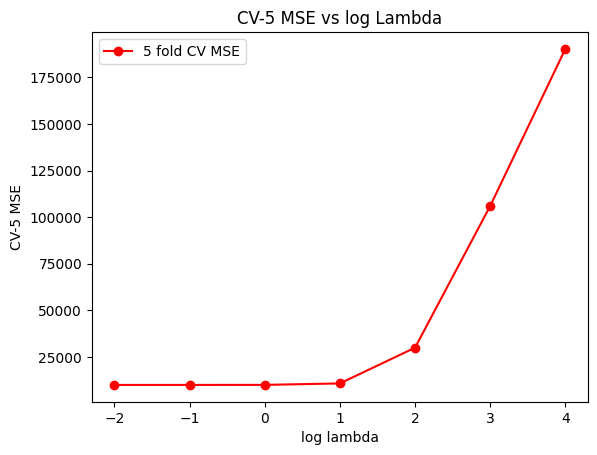

In [62]:
# print MSE for each 5 fold cross validation against 
#     its corresponding lamda
x = np.log10(lambdas_vector)
y = mse_vector
plt.title("CV-5 MSE vs log Lambda")
plt.xlabel("log lambda")
plt.ylabel("CV-5 MSE")
plt.plot(x, y, color = "red", marker = "o", label = "5 fold CV MSE")
plt.legend()
plt.show()

In [63]:
#######################  DELIVERABLE 3 ##########################################################
# Indicate the value of λ that generated the smallest CV (5) error.

# Based on the above output from DELIVERABLE 2, the lambda value of 0.01 generated the smallest
#    mean squared error (MSE) 

In [64]:
#######################  DELIVERABLE 4 ##########################################################
# Given the optimal λ, retrain the model on the entire dataset of N = 400
#     observations and provide the estimates of the p = 9 best-fit model parameters.

# define alpha and lambda
alpha = pow (10, -5)
print("\nALPHA:", alpha)
lamb_da = lambdas_vector[0]
print("LAMBDA:", lamb_da)

# create betas array 
betas = []
# fill betas array with random numbers
for i in range(9):	
    betas.append( random.randrange(-10, 10, 1)/10 + 0.001 )
# check contents of betas array
print("\nINITIAL BETAS VECTOR:\n")
print( betas)

print("\nCONVERGENCE OF BETAS VECTOR:\n")
#converge vector betas
# β := β − 2α[λβ − trans(X)* (y − Xβ)]
for i in range (pow (10, 5)):
  A = np.matmul ( feature_matrix_X.transpose(), ( np.array(response_vector_Y) 
                                                - np.matmul(np.array(feature_matrix_X), np.array(betas)) ) )
  betas = np.array(betas) - 2*alpha* ( lamb_da*np.array(betas) - np.array(A) )
  if i%20000==0:
    print (betas)
     
print("\nFINAL CONVERGED BETAS VECTOR:\n")
print (betas)


ALPHA: 1e-05
LAMBDA: 0.01

INITIAL BETAS VECTOR:

[-0.499, 0.101, 0.301, 0.001, 0.701, 0.601, 0.401, 0.201, -0.399]

CONVERGENCE OF BETAS VECTOR:

[ 1.20487258  3.26605967  3.47316222  0.31832063  0.7023128   0.56656309
  0.31902645  1.15072525 -0.41628189]
[-274.81603239  347.68472756  268.06984022   20.33608689  -11.04426695
   -2.97241351    5.20652493  127.35079799   -4.09018767]
[-274.75255098  375.77296118  239.87954007   21.55083267  -11.01331789
   -3.11874044    5.20435747  127.51971789   -3.89693268]
[-274.70767831  395.62749767  219.95285652   22.40949166  -10.99144115
   -3.22217355    5.20282537  127.63912114   -3.76032786]
[-274.67595947  409.66193729  205.86741879   23.01644604  -10.97597729
   -3.2952866     5.20174239  127.72352289   -3.66376695]

FINAL CONVERGED BETAS VECTOR:

[-274.65353953  419.58195014  195.91135877   23.44546176  -10.96504691
   -3.34696536    5.2009769   127.78318088   -3.59551445]
